In [1]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [2]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e does not exist


In [3]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

torques_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=torques_ctrl_range[actuator_id])

In [4]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

# Trajectory

In [5]:
poi = np.array([
    [93, 243],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

[[  93  -38]
 [ 130  -38]
 [ 130  -58]
 [ 175  -58]
 [ 175  -18]
 [ 130  -18]
 [ 130  -58]
 [ 175  -58]
 [ 175  -38]
 [ 213  -38]
 [ 213  -58]
 [ 254  -58]
 [ 254 -117]
 [ 334 -117]
 [ 334 -137]
 [ 379 -137]
 [ 379  -97]
 [ 334  -97]
 [ 334 -137]]


'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [6]:
# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 


100%|██████████| 18/18 [00:01<00:00,  9.84it/s]

No of points in trajectory: 18000


In [7]:
'''
# Visualize trajectory
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.plot(ctr.t[:,0], ctr.t[:,1])
axs.set_title("Trajectory in XY plane")
axs.set_aspect(1)



fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in X direction')
axs[0].plot(times, ctr.t[:,0])
axs[0].set_title('Position in X direction')
axs[1].plot(times, velocity[:,0])
axs[1].set_title('Velocity in X direction')
axs[2].plot(times, acceleration[:,0])
axs[2].set_title('Acceleration in X direction')

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in Y direction')
axs[0].plot(times, ctr.t[:,1])
axs[0].set_title('Position in Y direction')
axs[1].plot(times, velocity[:,1])
axs[1].set_title('Velocity in Y direction')
axs[2].plot(times, acceleration[:,1])
axs[2].set_title('Acceleration in Y direction')'''




'\n# Visualize trajectory\nfig, axs = plt.subplots(1, 1, figsize=(10, 10))\naxs.plot(ctr.t[:,0], ctr.t[:,1])\naxs.set_title("Trajectory in XY plane")\naxs.set_aspect(1)\n\n\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in X direction\')\naxs[0].plot(times, ctr.t[:,0])\naxs[0].set_title(\'Position in X direction\')\naxs[1].plot(times, velocity[:,0])\naxs[1].set_title(\'Velocity in X direction\')\naxs[2].plot(times, acceleration[:,0])\naxs[2].set_title(\'Acceleration in X direction\')\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in Y direction\')\naxs[0].plot(times, ctr.t[:,1])\naxs[0].set_title(\'Position in Y direction\')\naxs[1].plot(times, velocity[:,1])\naxs[1].set_title(\'Velocity in Y direction\')\naxs[2].plot(times, acceleration[:,1])\naxs[2].set_title(\'Acceleration in Y direction\')'

[0.27174544 2.93753192 2.07800676 2.83844298 1.57079635 1.84254176]


""

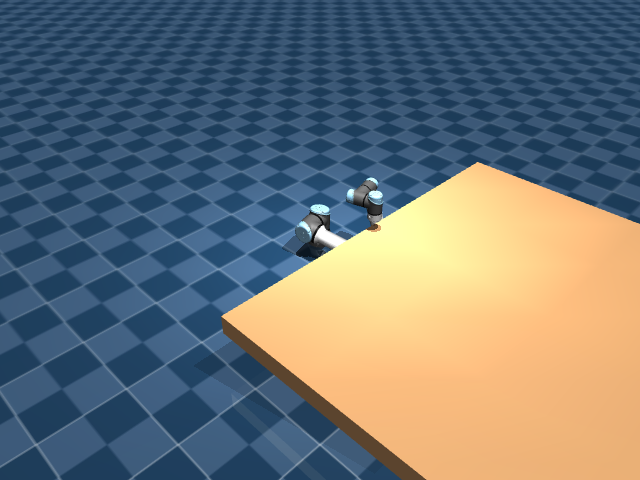

In [8]:
# Use the inverse kinematics to make a start pose for the robot
sol = ur5e.invkin(ctr[0])
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
# 0.27174445, -1.40474226, -2.07800756, -1.2296391,   1.57079635,  1.84254078

# Controller

In [9]:
# Test for cartesian space positon control
# Define duration of simulation
showVideo = True
duration = 5  # (seconds)
print(f"Duration of simulation: {duration} seconds")
framerate = 30  # (Hz)
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))


# start pose
start_q = np.array([0.27174445, -1.40474226, -2.07800756, -1.2296391,   1.57079635,  1.84254078]) #above the table

mujoco.mj_resetData(ur5e.m, ur5e.d)  # Reset state and time.
ur5e.d.qpos[:] = start_q
mujoco.mj_forward(ur5e.m, ur5e.d)

# Define the mapping of subspace of motion controller
S_v = np.diag([1.0, 1.0, 1.0, 1.0, 1.0]) #added 0 so it does not lift the 
zero_row = np.zeros((1,5))
S_v = np.insert(S_v, 2, zero_row,axis=0)
S_v_transposed = np.linalg.pinv(S_v)

# Define the gains for the motion controller
kp_trans_val = 1000
kp_rot_val = 2000
kp_trans = np.array([kp_trans_val, kp_trans_val])
kp_rot = np.array([kp_rot_val, kp_rot_val, kp_rot_val])
kd_trans = 2*np.sqrt(kp_trans)
kd_rot = 2*np.sqrt(kp_rot)
kp = np.diag(np.concatenate((kp_trans, kp_rot), axis=0))
kd = np.diag(np.concatenate((kd_trans, kd_rot), axis=0))


ki = np.eye(5)

for i in range(2):
    ki[i][i] = 2

error_ki = 0

# Define the  mapping of subspace of force controller
S_f = np.array([0,0,1,0,0,0])
#S_f_transposed = np.linalg.pinv(S_f)
S_f_transposed = S_f.transpose()

# Define the gains for the force controller
k_p_lambda_val = 0.01
m_lambda_val = 2000
k_d_lambda_val = 2*np.sqrt(m_lambda_val*k_p_lambda_val) 
k_p_lambda = np.array([k_p_lambda_val])
k_d_lambda = np.array([k_d_lambda_val])
has_been_in_contact = 0

# logging and display video.
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
accelerations = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 3))
forces_filtered = np.zeros((n_steps, 3))
force_reference = np.zeros((n_steps, 6))
control_acceleration = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
target_accelerations = np.zeros((n_steps, 6))
nan_array = np.full((n_steps, 1), np.nan)

joints = []
torques = np.zeros((n_steps, 6))
lambdas = np.zeros((n_steps, 3))
p_contacts_log = np.zeros((n_steps, 4))
prev_h_e = np.array([0,0,0,0,0,0])

#Stiffness matrix for calculation of derivative of force (dlabmda_)
K_stiffness_val = 1
K_stiffness = np.diag([K_stiffness_val]*6)

# array of solimp values
#ur5e.m.opt.override = "enable"
'''
ur5e.m.opt.enableflags = 1
print("enablefalgs integer value (bitmask): ", ur5e.m.opt.enableflags)
solimp_0 = np.arange(0, 1, 0.1)
solimp_0 = np.array([0.9])
print("solimp array: ", solimp_0)
'''


# get translational part of T_pen_array
p = np.zeros((len(ctr), 2))

for i in range(len(ctr)):
    p[i] = ctr[i].t[0:2]

# get desired position in subspace
p = np.hstack((p, np.zeros((len(ctr), 1)), np.ones((len(ctr), 1)), np.zeros((len(ctr), 1))))
dp = np.gradient(p, axis=0)
ddp = np.gradient(dp, axis=0)

contact_points = []
contact_forces = []

do_only_once = 0

############################################################################################################
##CUSUM TEST!!!!!!!!!!!!!!!!!!!!
############################################################################################################
# Initialize cumulative sum
cumulative_force_z = 0

# Define thresholds for contact detection
contact_threshold = 5  # Threshold for considering contact
release_threshold = -0.003  # Threshold for considering release

############################################################################################################

############################################################################################################


mujoco.mj_resetData(ur5e.m, ur5e.d)  # Reset state and time.
ur5e.d.qpos[:] = start_q
mujoco.mj_forward(ur5e.m, ur5e.d)
'''
ur5e.m.opt.o_solimp[0] = solimp_0[i]
#ur5e.m.opt.o_friction[:2] = np.zeros(2)
#ur5e.m.opt.o_friction[3:] = np.zeros(2)
print("o_solipm: ", ur5e.m.opt.o_solimp)
print("o_solref: ", ur5e.m.opt.o_solref)
print("o_friction: ", ur5e.m.opt.o_friction)'''

############################### ADDED FOR PROJECT ##################################

stiffness_torques = np.zeros((n_steps, 6))
damping_torques = np.zeros((n_steps, 6))
external_forces = np.zeros((n_steps, 3))
contact_torques = np.zeros((n_steps, 6))
total_torques = np.zeros((n_steps, 6))
work_done = np.zeros((n_steps, 6))
work_done_log = np.zeros(n_steps)  # Total work done log
total_torque_log = np.zeros((n_steps, 6))

#####################################################################################

progress_bar = tqdm(total=duration)
idx = 0
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)

    #Motion controller
    #Desired trajectory
    quat_d = r2q(T0.R)
    

    r_d = np.array([np.array(T0.t),quat_d[1:]]).flatten()
    #print(r_d.shape)
    dr_d = np.array([0,0,0,0,0,0])
    ddr_d = np.array([0,0,0,0,0,0])

    #Desired trajectory in sub space
    vd = S_v_transposed @ r_d
    dvd = S_v_transposed @ dr_d
    ddvd = S_v_transposed @ ddr_d

    #Current position in cartesian space
    tcp_pos = ur5e.fkine(ur5e.d.qpos)

    #Analytical jacobian
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    if(np.abs(np.linalg.det(J)) <= 0.001):
        print("Singular configuration ", ur5e.d.time, np.linalg.det(J))
        break

    #Current position xyz,qx,qy,qz
    quat_e = r2q(tcp_pos.R)
    r_e = np.array([tcp_pos.t, quat_e[1:] ]).flatten()
    positions_as_quat[idx] = np.concatenate((r_e, np.array([quat_e[0]])))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    #Current endeffector velocity in cartesian space
    v_e = J @ ur5e.d.qvel
    velocities[idx] = v_e


    #Current endeffector velocity  and position in subspace
    v = S_v_transposed @ v_e 
    r = S_v_transposed @ r_e

    #Motion controller

    error_ki += (p[idx] - r)
    #alpha_v = ddvd + kd @ (dvd - v) + kp @ (vd - r)
    alpha_v = ddp[idx] + kd @ (dp[idx] - v) + kp @ (p[idx] - r) #+ ki @ error_ki

    targetPosQuat = np.array(p[idx][:2])
    targetPosQuat = np.append(targetPosQuat, 0)
    targetPosQuat = np.append(targetPosQuat, np.array(quat_d))
    target_positions_as_quat[idx] = targetPosQuat
    target_positions[idx] = np.concatenate([p[idx][:2], np.array([0]), T0.rpy(order='xyz')])
    target_velocities[idx] = np.concatenate([dp[idx][:2], np.array([0]), np.array([0,0,0])])
    target_accelerations[idx] = np.concatenate([ddp[idx][:2], np.array([0]), np.array([0,0,0])])

    #Compute K' for rotation i quaternion space
    eta_diff = np.array([quat_d[0]*quat_e[0] - np.dot(quat_d[1:], quat_e[1:])])
    eps_diff = quat_d[0]*quat_e[1:] - quat_e[0]*quat_d[1:] - skewSymmetric(quat_e[1:])@quat_d[1:]
    quat_diff = np.concatenate((eta_diff, eps_diff))
    
    K_rot = K_(quat_diff, np.diag(kp_rot))
    alpha_v[2:] = ddvd[2:] + np.diag(kd_rot) @ (dvd[2:] - v[2:]) + K_rot @ (eps_diff)
    #Acceleration in cartesion space
    alpha_m = S_v @ alpha_v

    #Acceleration in joint space
    alpha_m_joint = np.linalg.pinv(J) @ (alpha_m - dJ @ ur5e.d.qvel)

    #Force controller
    #Desired force
    h_d = np.array([0,0,-5,0,0,0])
    force_reference[idx] = h_d
    lambda_d = S_f_transposed @ h_d

    #Endeffector force
    h_e = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    contact_point = np.array([0,0,0,0])
    p_contacts,f_contacts,geom1s,geom2s,distance = ur5e.get_contact_info()

    if(len(f_contacts)):
        #print(f_contacts[0])
        h_e[0] = f_contacts[0][0]
        h_e[1] = f_contacts[0][1]
        h_e[2] = f_contacts[0][2]
        contact_point[0]  = p_contacts[0][0]
        contact_point[1]  = p_contacts[0][1]
        contact_point[2]  = p_contacts[0][2]
        contact_point[3]  = distance[0]

    forces[idx] = h_e[0:3]
    p_contacts_log[idx] = contact_point

    #derivative of h_e
    dhe = h_e - prev_h_e
    prev_h_e = h_e
    
    #force in subspace
    lambda_ = S_f_transposed @ -h_e
    dlambda_ = S_f_transposed @ -dhe
    #dlambda_ = S_f_transposed @ K_stiffness @ J @ ur5e.d.qvel

    #Force controller
    vz = S_f_transposed @ v_e 
    f_lambda = k_p_lambda*(lambda_d-lambda_) - k_d_lambda * 5 * vz #lambda_d #- 0.0
    

    # Update cumulative sum of force in z-direction
    cumulative_force_z += forces[idx, 2] * stepsize
    #print("cumulative_force_z: ",cumulative_force_z)
    
    # Check for contact based on CUSUM
    if cumulative_force_z > contact_threshold:
        has_been_in_contact = 1

    
    # Check for release based on CUSUM
    if cumulative_force_z < release_threshold:
        has_been_in_contact = 0
        cumulative_force_z = 0  # Reset cumulative sum
    

    
    lambdas[idx][0] = lambda_d
    lambdas[idx][1] = lambda_
    lambdas[idx][2] = f_lambda[0]
    #Force in cartesian space

    ### #######################################3 ADDED FOR PROJECT ###############################
    
    r_trans = r[:3]
    r_rot = r[2:]
    r_e_trans = r_e[:3]
    r_e_rot = r_e[2:]

    v_trans = v[:3]
    v_rot = v[2:]

    vd_trans = vd[:3]
    vd_rot = vd[2:]

    # Motion control law for translation (position)
    alpha_v_trans = vd_trans - r_trans  # Translational error
    alpha_v_rot = vd_rot - r_rot  # Rotational error

    # Define the translational and rotational components
    lambda_trans = lambda_  # Translational force
    tau_rot = lambda_ # Rotational torque (assuming same structure for rotational components)

    # Force and torque in joint space
    f_lambda_joint = np.linalg.pinv(J) @ (lambda_ - dJ @ ur5e.d.qvel)
    tau_joint = np.linalg.pinv(J) @ (tau_rot - dJ @ ur5e.d.qvel)

    # Total joint torque (motion control + force control)
    total_torque = alpha_m_joint + f_lambda_joint  # Sum of motion and force control torques

    prev_r_trans = np.zeros(3)  # Previous position in translation space
    prev_r_rot = np.zeros(3)

    # Calculate the total work done (translational + rotational)
    # Work is the dot product of force and displacement (change in position)
    delta_r_trans = r_trans - prev_r_trans  # Change in translational position
    delta_r_rot = r_rot - prev_r_rot  # Change in rotational orientation

    # Translational work done: force * displacement
    work_trans = np.dot(lambda_trans, delta_r_trans)  # Force (lambda_trans) * displacement (delta_r_trans)

    # Rotational work done: torque * angular displacement
    # Assuming that angular displacement is represented as a difference in the rotation matrix or quaternion
    work_rot = np.dot(tau_rot, delta_r_rot)  # Torque (tau_rot) * angular displacement (delta_r_rot)

    # Total work done (translational + rotational)
    total_work_done = work_trans + work_rot

    # Scalarize total work done (for logging)
    total_work_done_scalar = np.sum(total_work_done)  # Sum of both translational and rotational work

    # Logging the work done
    work_done_log[idx] = np.abs(total_work_done_scalar)  # Now it's a scalar value representing the total work done

    # Update previous positions for next iteration
    prev_r_trans = r_trans.copy()
    prev_r_rot = r_rot.copy()
    
    ### ################################# ADDED FOR PROJECT ################################

    alpha_f = S_f * f_lambda

    control_acceleration[idx] = alpha_f + alpha_m
    #Force in joint space
    alpha_f_joint = np.linalg.pinv(J) @ (alpha_f - dJ @ ur5e.d.qvel)

    #Total acceleration joint space
    alpha = alpha_m_joint + alpha_f_joint
    
    # inverse dynamics to compute required torque
    prev = ur5e.d.qacc.copy()
    ur5e.d.qacc[:] = alpha
    mujoco.mj_inverse(ur5e.m, ur5e.d)
    sol = ur5e.d.qfrc_inverse.copy()
    torques[idx] = sol
    ur5e.d.qacc[:] = prev

    # set computed torque as control
    ur5e.d.ctrl[:] = sol #np.zeros(6)

    #make step
    mujoco.mj_step(ur5e.m, ur5e.d)

    joints.append(np.array(ur5e.d.qpos.copy()))

    if len(frames) < ur5e.d.time * framerate and showVideo:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    p_contacts, f_contacts, geom1s, geom2s, p_distance= ur5e.get_contact_info()

    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        contact_points.append(list(p_contact))
        contact_forces.append(list(f_contact))
    idx += 1

accelerations = np.gradient(velocities, axis=0)
forces_filtered = forces.copy()
progress_bar.close()
    
for i in range(forces.shape[0]):
    if(forces[i,2] > 0):
        print("Force z", forces[i,2], "at time", i*stepsize)
        if forces[i,2] < 300:
            print("Force z", forces[i,2], "at time", i*stepsize)
            break
        break



joints = np.array(joints)
if showVideo:
    media.show_video(frames, fps=framerate)




Duration of simulation: 5 seconds


100%|█████████▉| 4.999999999999671/5 [00:06<00:00,  1.28s/it]  


Force z 27.141668113667095 at time 0.0
Force z 27.141668113667095 at time 0.0


In [10]:
#print("work_done_log shape", work_done_log)  # Now it's a scalar

# For total torque, which is already a 6D vector
#print("total_torque_log shape", total_torques)

In [11]:
'''
import numpy as np
import matplotlib.pyplot as plt

time = np.arange(len(work_done_log)) * stepsize  # Time array (length of work_done_log)

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot Total Torques for each joint (columns of total_torque_log)
for i in range(6):
    axs[0].plot(time, total_torque_log[:, i], label=f"Joint {i+1}")
axs[0].set_title("Total Torques")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Torque (Nm)")
axs[0].legend()

# Plot Work Done (work_done_log is 1D, so we just plot it directly)
axs[1].plot(time, work_done_log, label="Total Work Done", color='tab:blue')
axs[1].set_title("Total Work Done")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Work (Joules)")
axs[1].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ntime = np.arange(len(work_done_log)) * stepsize  # Time array (length of work_done_log)\n\n# Create a figure with subplots\nfig, axs = plt.subplots(2, 1, figsize=(12, 10))\n\n# Plot Total Torques for each joint (columns of total_torque_log)\nfor i in range(6):\n    axs[0].plot(time, total_torque_log[:, i], label=f"Joint {i+1}")\naxs[0].set_title("Total Torques")\naxs[0].set_xlabel("Time (s)")\naxs[0].set_ylabel("Torque (Nm)")\naxs[0].legend()\n\n# Plot Work Done (work_done_log is 1D, so we just plot it directly)\naxs[1].plot(time, work_done_log, label="Total Work Done", color=\'tab:blue\')\naxs[1].set_title("Total Work Done")\naxs[1].set_xlabel("Time (s)")\naxs[1].set_ylabel("Work (Joules)")\naxs[1].legend()\n\n# Adjust layout and display the plot\nplt.tight_layout()\nplt.show()\n'

In [12]:
import pandas as pd


# Create DataFrame
df = pd.DataFrame({
    "actual_position_0": positions_as_rpy[:,0],
    "actual_position_1": positions_as_rpy[:,1],
    "actual_position_2": positions_as_rpy[:,2],
    "actual_position_3": positions_as_rpy[:,3],
    "actual_position_4": positions_as_rpy[:,4],
    "actual_position_5": positions_as_rpy[:,5],
    "actual_velocity_0": velocities[:,0],
    "actual_velocity_1": velocities[:,1],
    "actual_velocity_2": velocities[:,2],
    "actual_velocity_3": velocities[:,3],
    "actual_velocity_4": velocities[:,4],
    "actual_velocity_5": velocities[:,5],
    "actual_acceleration_0": accelerations[:,0],
    "actual_acceleration_1": accelerations[:,1],
    "actual_acceleration_2": accelerations[:,2],
    "actual_acceleration_3": accelerations[:,3],
    "actual_acceleration_4": accelerations[:,4],
    "actual_acceleration_5": accelerations[:,5],
    "actual_force_0": forces[:,0],
    "actual_force_1": forces[:,1],
    "actual_force_2": forces[:,2],
    "actual_force_3": nan_array.flatten(),
    "actual_force_4": nan_array.flatten(),
    "actual_force_5": nan_array.flatten(),
    "actual_force_filtered_0": forces_filtered[:,0],
    "actual_force_filtered_1": forces_filtered[:,1],
    "actual_force_filtered_2": forces_filtered[:,2],
    "actual_force_filtered_3": nan_array.flatten(),
    "actual_force_filtered_4": nan_array.flatten(),
    "actual_force_filtered_5": nan_array.flatten(),
    "force_reference_0": -force_reference[:,0],
    "force_reference_1": -force_reference[:,1],
    "force_reference_2": -force_reference[:,2],
    "force_reference_3": -force_reference[:,3],
    "force_reference_4": -force_reference[:,4],
    "force_reference_5": -force_reference[:,5],
    "control_velocity_0": nan_array.flatten(),
    "control_velocity_1": nan_array.flatten(),
    "control_velocity_2": nan_array.flatten(),
    "control_velocity_3": nan_array.flatten(),
    "control_velocity_4": nan_array.flatten(),
    "control_velocity_5": nan_array.flatten(),
    "control_acceleration_0": control_acceleration[:,0],
    "control_acceleration_1": control_acceleration[:,1],
    "control_acceleration_2": control_acceleration[:,2],
    "control_acceleration_3": control_acceleration[:,3],
    "control_acceleration_4": control_acceleration[:,4],
    "control_acceleration_5": control_acceleration[:,5],
    "positions_as_quat_0": positions_as_quat[:,0],
    "positions_as_quat_1": positions_as_quat[:,1],
    "positions_as_quat_2": positions_as_quat[:,2],
    "positions_as_quat_3": positions_as_quat[:,3],
    "positions_as_quat_4": positions_as_quat[:,4],
    "positions_as_quat_5": positions_as_quat[:,5],
    "positions_as_quat_6": positions_as_quat[:,6],
    "target_positions_as_quat_0": target_positions_as_quat[:,0],
    "target_positions_as_quat_1": target_positions_as_quat[:,1],
    "target_positions_as_quat_2": target_positions_as_quat[:,2],
    "target_positions_as_quat_3": target_positions_as_quat[:,3],
    "target_positions_as_quat_4": target_positions_as_quat[:,4],
    "target_positions_as_quat_5": target_positions_as_quat[:,5],
    "target_positions_as_quat_6": target_positions_as_quat[:,6],
    "target_positions_0": target_positions[:,0],
    "target_positions_1": target_positions[:,1],
    "target_positions_2": target_positions[:,2],
    "target_positions_3": target_positions[:,3],
    "target_positions_4": target_positions[:,4],
    "target_positions_5": target_positions[:,5],
    "target_velocities_0": target_velocities[:,0],
    "target_velocities_1": target_velocities[:,1],
    "target_velocities_2": target_velocities[:,2],
    "target_velocities_3": target_velocities[:,3],
    "target_velocities_4": target_velocities[:,4],
    "target_velocities_5": target_velocities[:,5],
    "target_accelerations_0": target_accelerations[:,0],
    "target_accelerations_1": target_accelerations[:,1],
    "target_accelerations_2": target_accelerations[:,2],
    "target_accelerations_3": target_accelerations[:,3],
    "target_accelerations_4": target_accelerations[:,4],
    "target_accelerations_5": target_accelerations[:,5],
})

# Save to CSV
df.to_csv('data/accFF_condim3_friction1_dampening100.csv', index=False)

/tmp/ipykernel_9733/3021843191.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sc, ax=axs, pad=0.05, aspect=40)


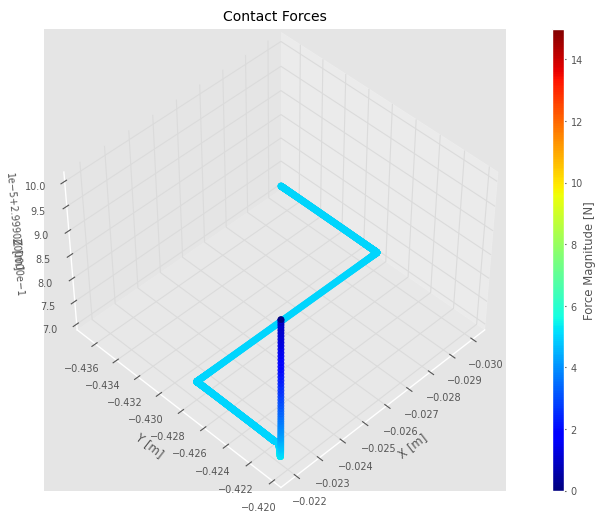

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Unpack individual components of contact points and forces
x_contact, y_contact, z_contact = zip(*contact_points)

# Find the magnitude of forces
force_magnitude = np.linalg.norm(contact_forces, axis=1)
max_magnitude = max(force_magnitude)

# make plot only for contact forces angle (45, 45)
fig, axs = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'projection': '3d'})
#axs.scatter(x_contact, y_contact, z_contact, c=force_magnitude, cmap='jet')
temp = np.array(contact_forces)[:,2]
sc = axs.scatter(x_contact, y_contact, z_contact, c=temp, cmap='jet', vmin=0, vmax=15)
axs.set_title('Contact Forces')
axs.set_xlabel('X [m]')
axs.set_ylabel('Y [m]')
axs.set_zlabel('Z [m]')
axs.view_init(elev=45, azim=45)
cbar = fig.colorbar(sc, ax=axs, pad=0.05, aspect=40)
cbar.set_label('Force Magnitude [N]')
plt.savefig("contact_forces.pdf")


ValueError: x and y must have same first dimension, but have shapes (7500,) and (2500,)

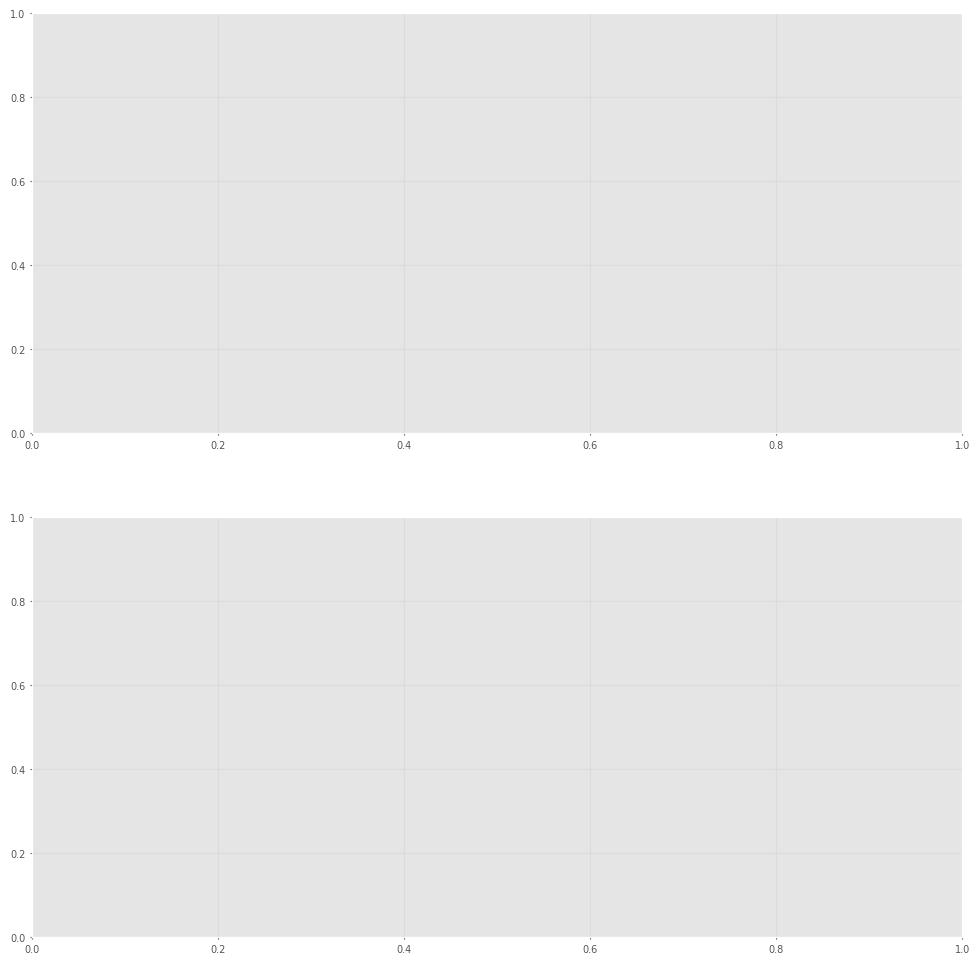

In [14]:
'''
# plot force in z direction
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].plot(times[:7500], forces_filtered[:7500,2])
axs[0].plot(times[:7500], -force_reference[:7500,2])
axs[0].set_title('Force in Z direction')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Force [N]')
axs[1].plot(times[:7500], positions_as_quat[:7500,3])
axs[1].set_title('Position in Z direction')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Position [m]')
plt.savefig("force_z.pdf")
'''

##### Position plot


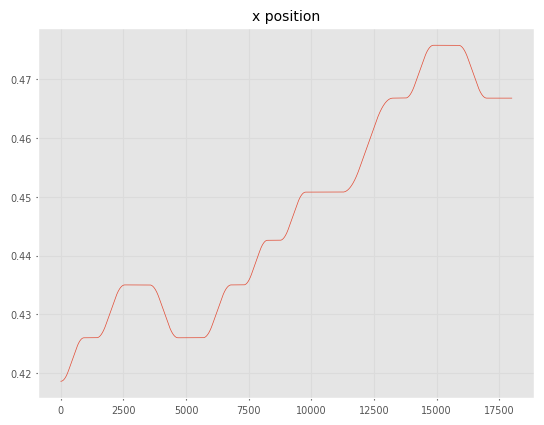

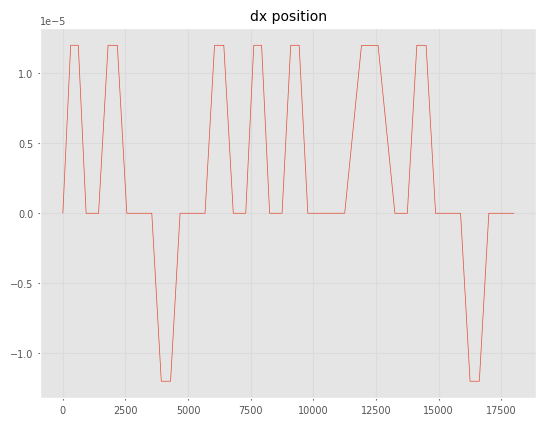

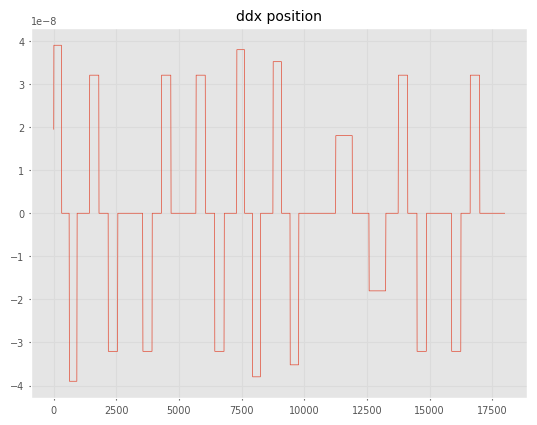

In [32]:
xpos = p[:,0]
ypos = p[:,1]

dxpos = dp[:,0]
dypos = dp[:,1]

ddxpos = ddp[:,0]
ddypos = ddp[:,1]

#xposition
plt.plot(xpos)
plt.title("x position")
plt.show()

plt.plot(dxpos)
plt.title("dx position")
plt.show()

plt.plot(ddxpos)
plt.title("ddx position")
plt.show()


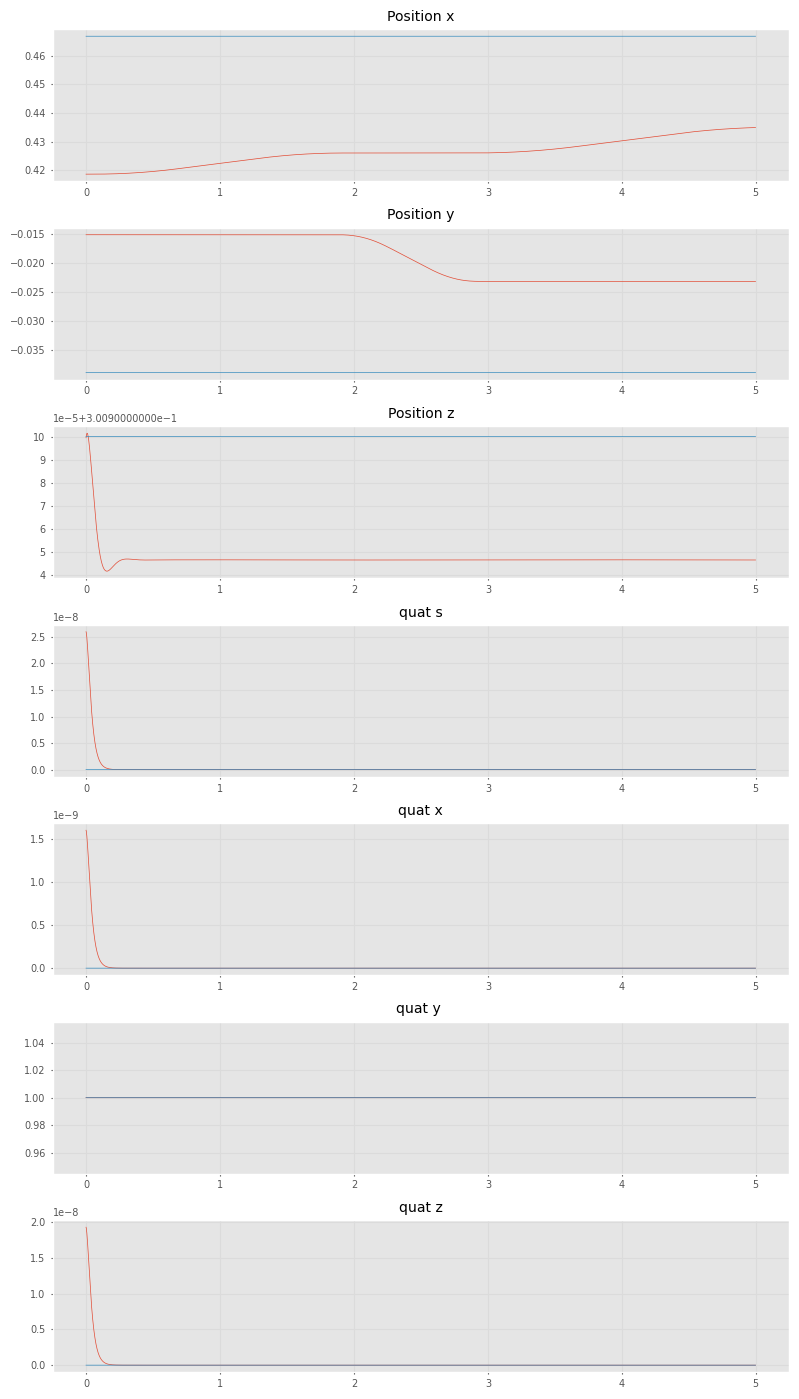

In [40]:
fig, axs = plt.subplots(7, 1, figsize=(8, 14))

axs[0].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,0])
axs[0].plot(np.arange(n_steps)*stepsize, T0.t[0]*np.ones(n_steps))
axs[0].set_title('Position x')

axs[1].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,1])
axs[1].plot(np.arange(n_steps)*stepsize, T0.t[1]*np.ones(n_steps))
axs[1].set_title('Position y')

axs[2].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,2])
axs[2].plot(np.arange(n_steps)*stepsize, 0.301*np.ones(n_steps))
#axs[2].set_ylim([0.2, 0.4])
axs[2].set_title('Position z')

axs[3].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,6])
axs[3].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[0]*np.ones(n_steps))
axs[3].set_title('quat s')

axs[4].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,3])
axs[4].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[1]*np.ones(n_steps))
axs[4].set_title('quat x')

axs[5].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,4])
axs[5].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[2]*np.ones(n_steps))
axs[5].set_title('quat y ')

axs[6].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,5])
axs[6].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[3]*np.ones(n_steps))
axs[6].set_title('quat z')

plt.tight_layout()
plt.show()


##### Force plot


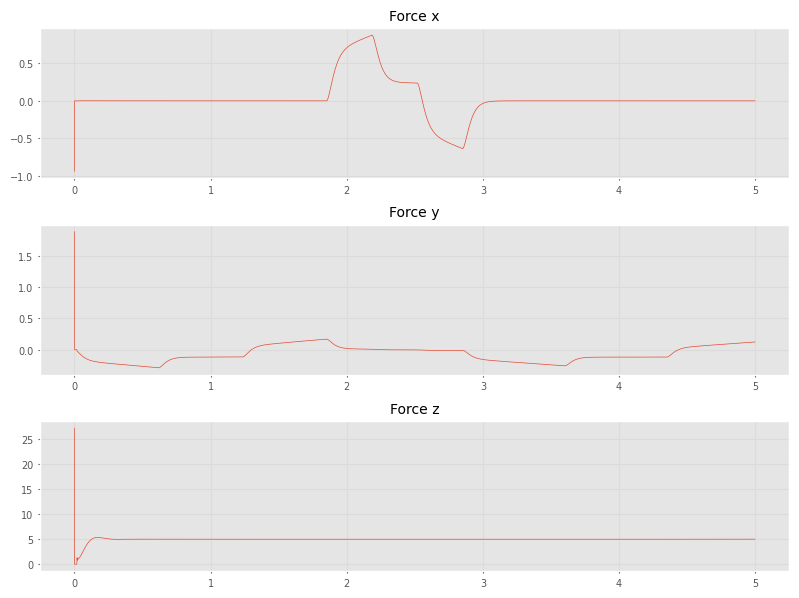

Force z 27.141668113667095 at time 0.0


In [41]:

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(np.arange(n_steps)*stepsize, forces[:,0])
axs[0].set_title('Force x')

axs[1].plot(np.arange(n_steps)*stepsize, forces[:,1])
axs[1].set_title('Force y')

axs[2].plot(np.arange(n_steps)*stepsize, forces[:,2])
axs[2].set_title('Force z')


plt.tight_layout()
plt.show()

for i in range(forces.shape[0]):
    if(forces[i,2] > 0):
        print("Force z", forces[i,2], "at time", i*stepsize)
        break

##### Joint pos plot

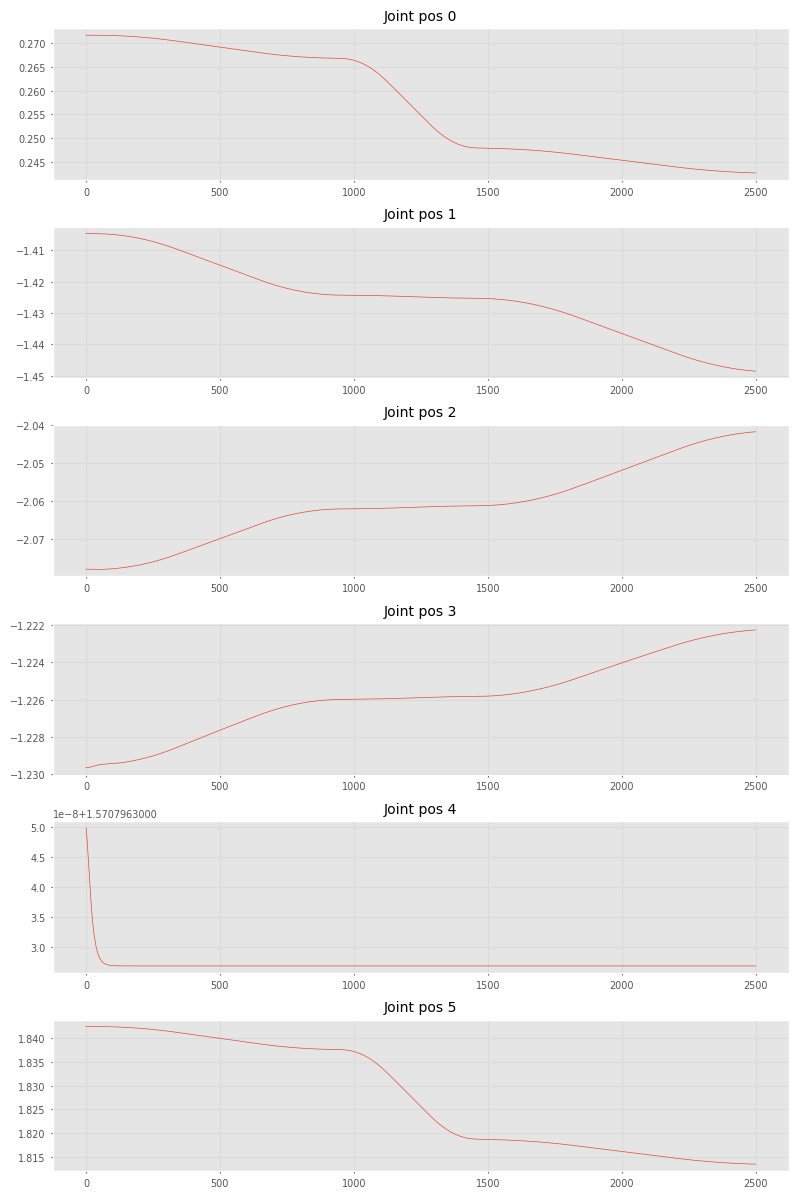

In [42]:


fig, axs = plt.subplots(6, 1, figsize=(8, 12))

axs[0].plot(joints[:,0])
axs[0].set_title('Joint pos 0')

axs[1].plot(joints[:,1])
axs[1].set_title('Joint pos 1')

axs[2].plot(joints[:,2])
axs[2].set_title('Joint pos 2')

axs[3].plot(joints[:,3])
axs[3].set_title('Joint pos 3')

axs[4].plot(joints[:,4])
axs[4].set_title('Joint pos 4')

axs[5].plot(joints[:,5])
axs[5].set_title('Joint pos 5')

plt.tight_layout()
plt.show()


##### Torque joint plot

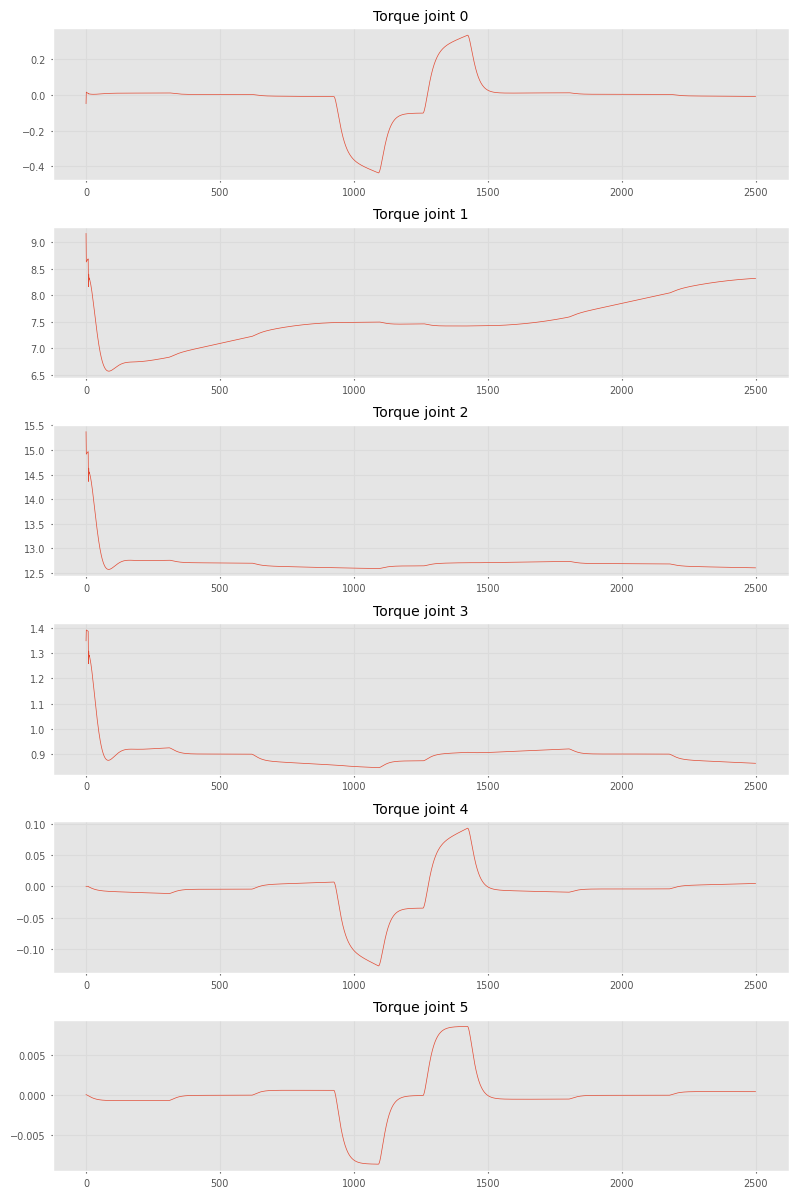

In [43]:

fig, axs = plt.subplots(6, 1, figsize=(8, 12))

axs[0].plot(torques[:,0])
axs[0].set_title('Torque joint 0')

axs[1].plot(torques[:,1])
axs[1].set_title('Torque joint 1')

axs[2].plot(torques[:,2])
axs[2].set_title('Torque joint 2')

axs[3].plot(torques[:,3])
axs[3].set_title('Torque joint 3')

axs[4].plot(torques[:,4])
axs[4].set_title('Torque joint 4')

axs[5].plot(torques[:,5])
axs[5].set_title('Torque joint 5')

plt.tight_layout()
plt.show()



##### lambda plot

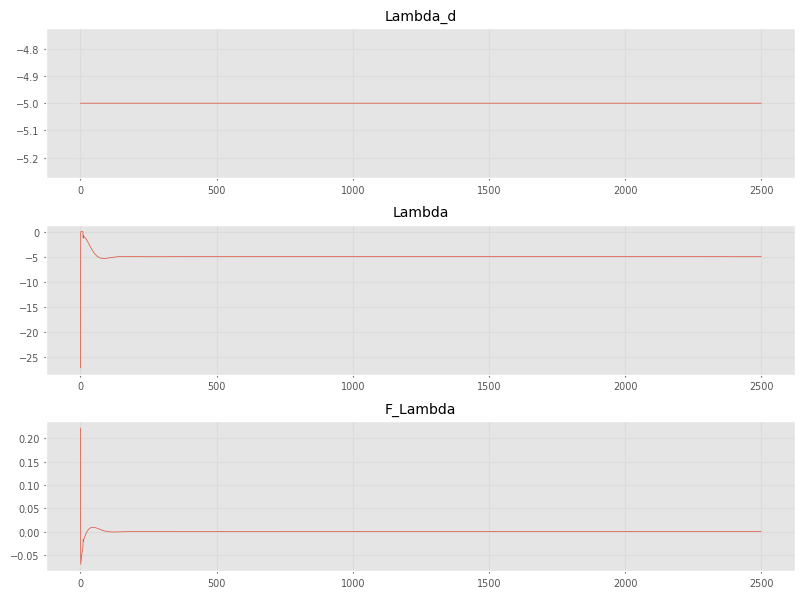

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(lambdas[:,0])
axs[0].set_title('Lambda_d')

axs[1].plot(lambdas[:,1])
#axs[1].vlines(213, -1000, 1000, colors='b', linestyles='dashed')
axs[1].set_title('Lambda')

axs[2].plot(lambdas[:,2])
#axs[2].set_ylim(-100,100)
axs[2].set_title('F_Lambda')


plt.tight_layout()
plt.show()


##### contact pos plot

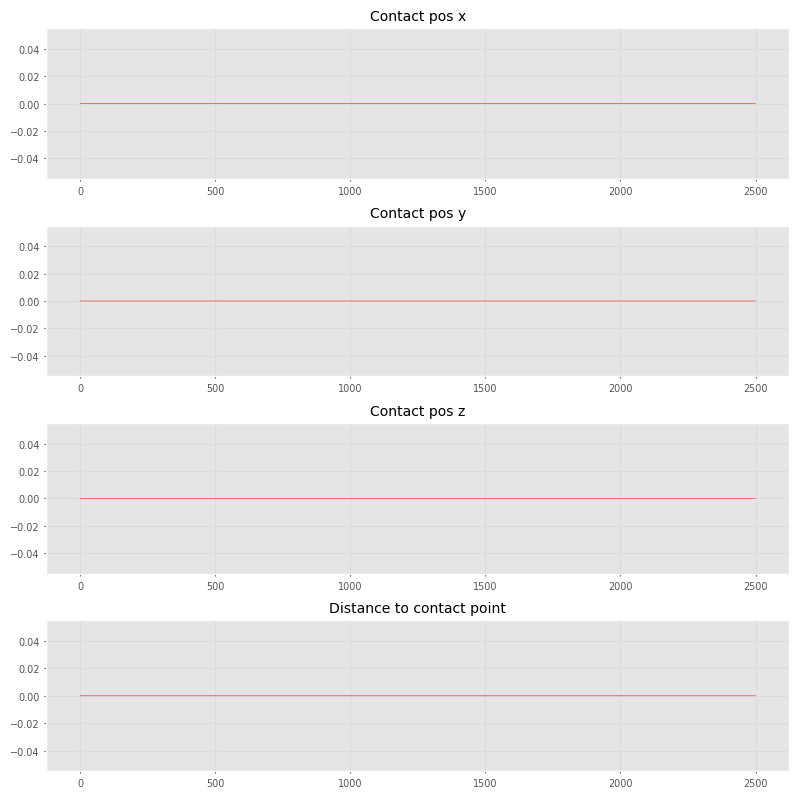

In [45]:
fig, axs = plt.subplots(4, 1, figsize=(8, 8))

axs[0].plot(p_contacts_log[:,0])
axs[0].set_title('Contact pos x')

axs[1].plot(p_contacts_log[:,1])
axs[1].set_title('Contact pos y')

axs[2].plot(p_contacts_log[:,2])
axs[2].set_title('Contact pos z')

axs[3].plot(p_contacts_log[:,3])
axs[3].set_title('Distance to contact point')


plt.tight_layout()
plt.show()

##### Debug

In [39]:
# append 3 zeros to the point
target_acc = np.append(target_acc, [0, 0, 0])
target_acc

NameError: name 'target_acc' is not defined

In [ ]:
# Test if we can run the mucojo interactive simulation
#with mujoco.viewer.launch_passive(ur5e.m, ur5e.d) as viewer:
#    while True:
#        mujoco.mj_step(ur5e.m, ur5e.d)
#        viewer.sync()       